#In this notebook , we are going to cover some of the most fundamental topics oof tensor through tensorflow


we are going to cover:
*introducttion to tensors

* getting info from tensors
* manipulating tensors
* manipulating tensors
* tensor numpy
* using @tf.function
* using gpus with tensorflow
* exersise


In [1]:
# this will be the main file from now 
import tensorflow as tf
print(tf.__version__)

2.6.0


In [2]:
Z = 100 + 200
print(Z)

300


In [3]:
scalar = tf.constant(7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [4]:
scalar.ndim

0

In [5]:
vector = tf.constant([1,2,3])
vector

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3], dtype=int32)>

In [6]:
vector.ndim

1

In [7]:
matrix = tf.constant([[1, 2, 3],[4, 5, 6]],dtype=tf.float64)
matrix

<tf.Tensor: shape=(2, 3), dtype=float64, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]])>

In [8]:
matrix.shape

TensorShape([2, 3])

In [9]:
matrix.ndim

2

In [10]:
matrix1=tf.constant([[1.,2.,3.],[4.,5.,6.],[7.,8.,9.]],)
matrix1

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]], dtype=float32)>

In [11]:
matrix1.shape
matrix.ndim

2

In [12]:
tensor = tf.constant([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])
tensor

<tf.Tensor: shape=(2, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]], dtype=int32)>

In [13]:
tensor.ndim

3

In [14]:
 random1 = tf.random.Generator.from_seed(42)
 random1 = random1.uniform(shape=(3,2))
 random2 = tf.random.Generator.from_seed(42)
 random2 = random2.uniform(shape=(3,2))
random1,random2, random1 == random2

(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[0.7493447 , 0.73561966],
        [0.45230794, 0.49039817],
        [0.1889317 , 0.52027524]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[0.7493447 , 0.73561966],
        [0.45230794, 0.49039817],
        [0.1889317 , 0.52027524]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=bool, numpy=
 array([[ True,  True],
        [ True,  True],
        [ True,  True]])>)

In [15]:

#notshuffeled = tf.random.Generator.from_seed(42)

notshuffeled=tf.constant([[1, 2],
                          [3, 4],
                          [5, 6]])
#shuffeling
#tf.random.set_seed(2)
tf.random.shuffle(notshuffeled,seed=2)


<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4],
       [5, 6]], dtype=int32)>

In [16]:
import numpy as np
arrayA=np.arange(1,31,dtype=np.int64)
arrayA
b=tf.constant(arrayA,shape=(2,5,3))
arrayA,b

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <tf.Tensor: shape=(2, 5, 3), dtype=int64, numpy=
 array([[[ 1,  2,  3],
         [ 4,  5,  6],
         [ 7,  8,  9],
         [10, 11, 12],
         [13, 14, 15]],
 
        [[16, 17, 18],
         [19, 20, 21],
         [22, 23, 24],
         [25, 26, 27],
         [28, 29, 30]]])>)

In [17]:
rank4tensor = tf.zeros(shape=(2,3,4,5))
rank4tensor

<tf.Tensor: shape=(2, 3, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

In [18]:
rank4tensor.dtype,rank4tensor.shape[3],rank4tensor[0,1],tf.size(rank4tensor).numpy()

(tf.float32, 5, <tf.Tensor: shape=(4, 5), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]], dtype=float32)>, 120)

In [19]:
identity = tf.eye(5)
from scipy import sparse
print(identity)
sparseidentity = sparse.csr_matrix(identity)
print(sparseidentity)


tf.Tensor(
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]], shape=(5, 5), dtype=float32)
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0
  (4, 4)	1.0


In [20]:
x = tf.random.Generator.from_seed(42)
x = tf.random.normal([2,3,4])
x,tf.size(x).numpy(),tf.rank(x)

(<tf.Tensor: shape=(2, 3, 4), dtype=float32, numpy=
 array([[[-0.1360695 , -0.25555623,  0.08099306, -0.9619037 ],
         [-0.61311877, -0.2840976 ,  1.1924485 , -0.18716529],
         [-1.4086154 ,  0.6222248 ,  0.36950862, -0.66322833]],
 
        [[ 0.29307103, -0.8257037 ,  0.47649086,  1.659516  ],
         [ 1.5511991 ,  1.455803  ,  0.6139322 , -0.285857  ],
         [-1.1814681 , -0.30989188, -1.4384197 ,  0.76656353]]],
       dtype=float32)>, 24, <tf.Tensor: shape=(), dtype=int32, numpy=3>)

In [21]:
data = np.ones(4)
row = np.arange(4)
col = np.arange(4)
x = sparse.coo_matrix((data,(row,col)))
data,row,
print(x)

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


[-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919
  -8.98989899  -8.78787879  -8.58585859  -8.38383838  -8.18181818
  -7.97979798  -7.77777778  -7.57575758  -7.37373737  -7.17171717
  -6.96969697  -6.76767677  -6.56565657  -6.36363636  -6.16161616
  -5.95959596  -5.75757576  -5.55555556  -5.35353535  -5.15151515
  -4.94949495  -4.74747475  -4.54545455  -4.34343434  -4.14141414
  -3.93939394  -3.73737374  -3.53535354  -3.33333333  -3.13131313
  -2.92929293  -2.72727273  -2.52525253  -2.32323232  -2.12121212
  -1.91919192  -1.71717172  -1.51515152  -1.31313131  -1.11111111
  -0.90909091  -0.70707071  -0.50505051  -0.3030303   -0.1010101
   0.1010101    0.3030303    0.50505051   0.70707071   0.90909091
   1.11111111   1.31313131   1.51515152   1.71717172   1.91919192
   2.12121212   2.32323232   2.52525253   2.72727273   2.92929293
   3.13131313   3.33333333   3.53535354   3.73737374   3.93939394
   4.14141414   4.34343434   4.54545455   4.74747475   4.94949495
   5.151515

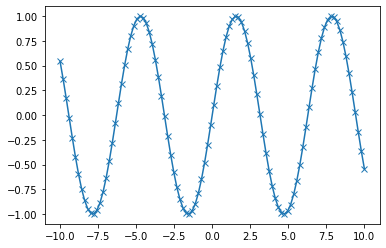

In [22]:
import matplotlib.pyplot as plt
# Generate a sequence of numbers from -10 to 10 with 100 steps in between
x = np.linspace(-10,10,100)
print(x)
# Create a second array using sine
y = np.sin(x)
# The plot function makes a line chart of one array against another
plt.plot(x, y, marker="x")

In [23]:
z = np.random.randn()
z
# print(sum(z))

0.42159642186554824

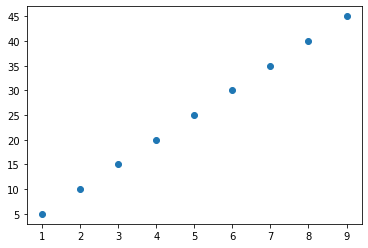

In [24]:
import matplotlib.pyplot as plt
X = tf.constant(np.arange(1,10,1))
y = tf.constant(np.arange(5,50,5))
plt.scatter(X,y);

In [25]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100, activation="elu"),
                             tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr = 0.01),
              metrics = ["mae"])
model.fit(X,y,epochs = 50)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/50
1/1 [==============================] - 1s 656ms/step - loss: 25.2924 - mae: 25.2924
Epoch 2/50
1/1 [==============================] - 0s 7ms/step - loss: 24.2711 - mae: 24.2711
Epoch 3/50
1/1 [==============================] - 0s 11ms/step - loss: 23.2453 - mae: 23.2453
Epoch 4/50
1/1 [==============================] - 0s 4ms/step - loss: 22.2125 - mae: 22.2125
Epoch 5/50
1/1 [==============================] - 0s 9ms/step - loss: 21.1711 - mae: 21.1711
Epoch 6/50
1/1 [==============================] - 0s 9ms/step - loss: 20.1181 - mae: 20.1181
Epoch 7/50
1/1 [==============================] - 0s 9ms/step - loss: 19.0488 - mae: 19.0488
Epoch 8/50
1/1 [==============================] - 0s 9ms/step - loss: 17.9587 - mae: 17.9587
Epoch 9/50
1/1 [==============================] - 0s 9ms/step - loss: 16.8438 - mae: 16.8438
Epoch 10/50
1/1 [==============================] - 0s 8ms/step - loss: 15.7003 - mae: 15.7003
Epoch 11/50
1/1 [==============================] - 0s 10ms/step - 

In [26]:
X,y

(<tf.Tensor: shape=(9,), dtype=int64, numpy=array([1, 2, 3, 4, 5, 6, 7, 8, 9])>,
 <tf.Tensor: shape=(9,), dtype=int64, numpy=array([ 5, 10, 15, 20, 25, 30, 35, 40, 45])>)

In [27]:
model.predict([10])

array([[47.579372]], dtype=float32)

In [28]:
x = int(input())
y = max(0,x) # elu fnction
print(y)

55
55


In [29]:
model.predict([5.5])

array([[26.574896]], dtype=float32)

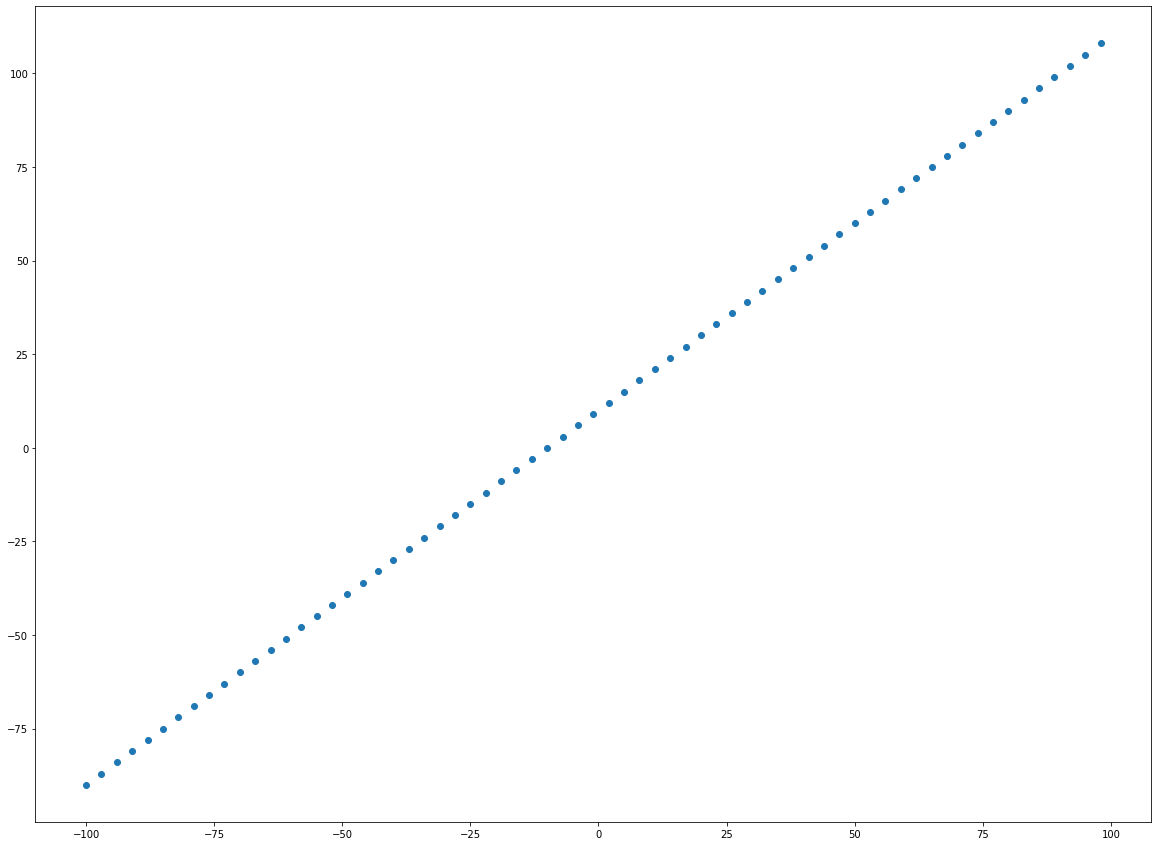

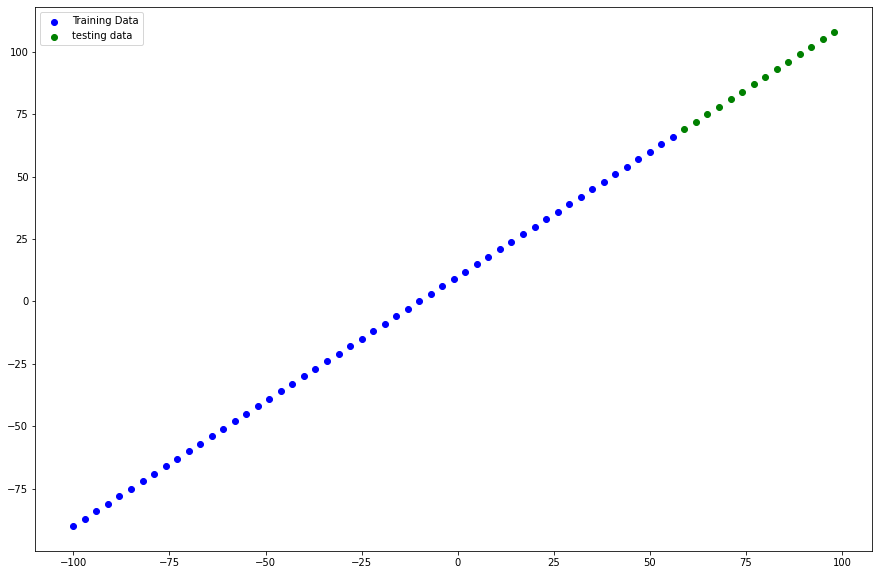

In [30]:
x = tf.range(-100,100,3)
y = x+10
x,y
x_train = x[:53]
x_test = x[53:]
y_train = y[:53]
y_test = y[53:]
plt.figure(figsize=(20,15))
plt.scatter(x,y)
plt.figure(figsize=(15,10))
plt.scatter(x_train,y_train,c='b',label = "Training Data")
plt.scatter(x_test,y_test,c='g',label = "testing data")
plt.legend()

In [31]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(3,input_shape = [2]),
  tf.keras.layers.Dense(1)
])
model.compile(loss = tf.keras.losses.mae,
           optimizer = tf.keras.optimizers.SGD(),
           metrics=["mae"])

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


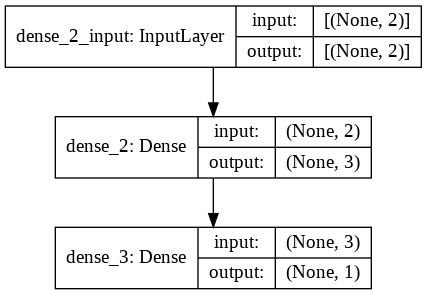

In [33]:
from tensorflow.keras.utils import plot_model
plot_model(model = model,show_shapes=True)

In [34]:
x_data = tf.range(-100,100,2)
x_data
y_data = x_data+10
y_data

<tf.Tensor: shape=(100,), dtype=int32, numpy=
array([-90, -88, -86, -84, -82, -80, -78, -76, -74, -72, -70, -68, -66,
       -64, -62, -60, -58, -56, -54, -52, -50, -48, -46, -44, -42, -40,
       -38, -36, -34, -32, -30, -28, -26, -24, -22, -20, -18, -16, -14,
       -12, -10,  -8,  -6,  -4,  -2,   0,   2,   4,   6,   8,  10,  12,
        14,  16,  18,  20,  22,  24,  26,  28,  30,  32,  34,  36,  38,
        40,  42,  44,  46,  48,  50,  52,  54,  56,  58,  60,  62,  64,
        66,  68,  70,  72,  74,  76,  78,  80,  82,  84,  86,  88,  90,
        92,  94,  96,  98, 100, 102, 104, 106, 108], dtype=int32)>

In [35]:
x_train_data = x_data[:80]
x_test_data = x_data[80:]
x_train_data,x_test_data
y_train_data = y_data[:80]
y_test_data = y_data[80:]
y_train_data,y_test_data

(<tf.Tensor: shape=(80,), dtype=int32, numpy=
 array([-90, -88, -86, -84, -82, -80, -78, -76, -74, -72, -70, -68, -66,
        -64, -62, -60, -58, -56, -54, -52, -50, -48, -46, -44, -42, -40,
        -38, -36, -34, -32, -30, -28, -26, -24, -22, -20, -18, -16, -14,
        -12, -10,  -8,  -6,  -4,  -2,   0,   2,   4,   6,   8,  10,  12,
         14,  16,  18,  20,  22,  24,  26,  28,  30,  32,  34,  36,  38,
         40,  42,  44,  46,  48,  50,  52,  54,  56,  58,  60,  62,  64,
         66,  68], dtype=int32)>, <tf.Tensor: shape=(20,), dtype=int32, numpy=
 array([ 70,  72,  74,  76,  78,  80,  82,  84,  86,  88,  90,  92,  94,
         96,  98, 100, 102, 104, 106, 108], dtype=int32)>)

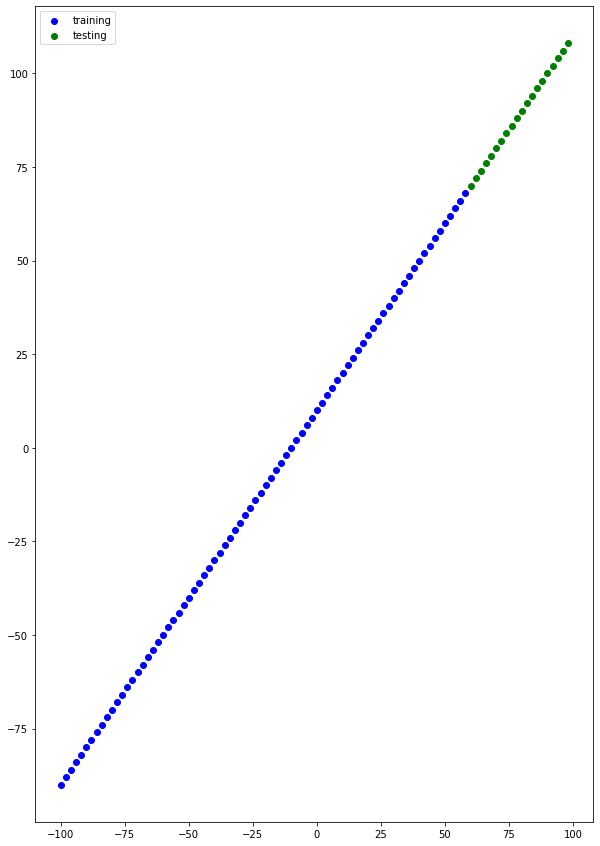

In [36]:
plt.figure(figsize=(10,15))
plt.scatter(x_train_data,y_train_data,c='b',label='training')
plt.scatter(x_test_data,y_test_data,c='g',label='testing')
plt.legend()

In [52]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape = [1]),
    tf.keras.layers.Dense(1)
    
])
model.compile(loss = tf.keras.losses.MAE,
              optimizer=tf.keras.optimizers.SGD(),
              metrics = ["mae"])
# model.compile(loss = tf.keras.losses.mae,
#            optimizer = tf.keras.optimizers.SGD(),
#            metrics=["mae"])

In [53]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               200       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.fit(x_train_data,y_train_data,epochs=100,verbose=0)

In [55]:
y_pred = model.predict(y_test_data)
y_pred

array([[ 94.7064  ],
       [ 97.33485 ],
       [ 99.963295],
       [102.59174 ],
       [105.22019 ],
       [107.84864 ],
       [110.47708 ],
       [113.10553 ],
       [115.733986],
       [118.36243 ],
       [120.990875],
       [123.619316],
       [126.247765],
       [128.87622 ],
       [131.50467 ],
       [134.13312 ],
       [136.76157 ],
       [139.39001 ],
       [142.01846 ],
       [144.64691 ]], dtype=float32)

In [56]:
y_pred_final = tf.squeeze(y_pred)
y_pred_final.ndim,y_pred_final.shape,y_pred_final,y_test_data

(1, TensorShape([20]), <tf.Tensor: shape=(20,), dtype=float32, numpy=
 array([ 94.7064  ,  97.33485 ,  99.963295, 102.59174 , 105.22019 ,
        107.84864 , 110.47708 , 113.10553 , 115.733986, 118.36243 ,
        120.990875, 123.619316, 126.247765, 128.87622 , 131.50467 ,
        134.13312 , 136.76157 , 139.39001 , 142.01846 , 144.64691 ],
       dtype=float32)>, <tf.Tensor: shape=(20,), dtype=int32, numpy=
 array([ 70,  72,  74,  76,  78,  80,  82,  84,  86,  88,  90,  92,  94,
         96,  98, 100, 102, 104, 106, 108], dtype=int32)>)

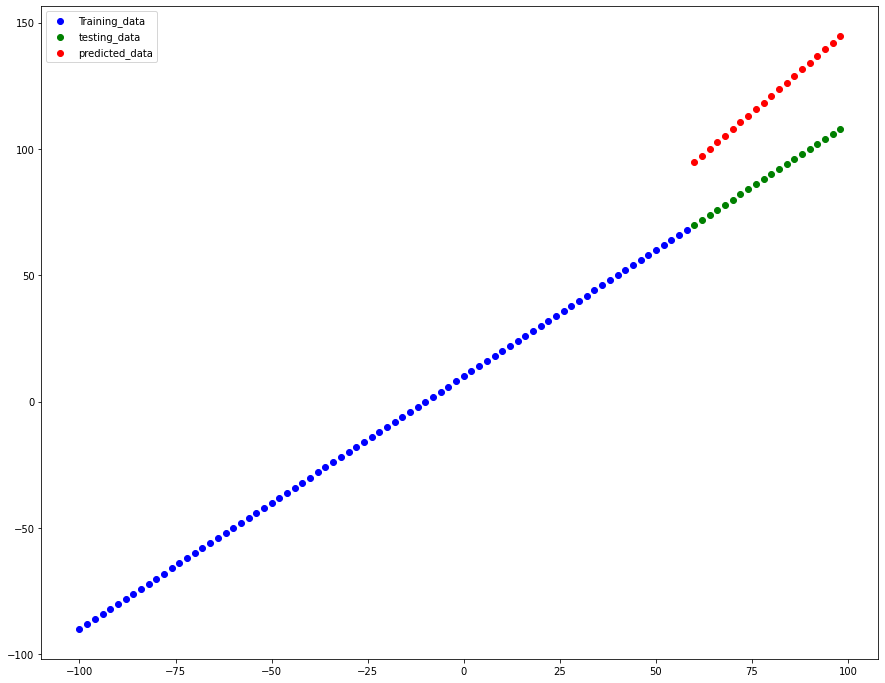

In [57]:
def plot_prediction(traindata = x_train_data,trainlabels = y_train_data,testdata = x_test_data,testlabels = y_test_data,preddata = y_pred_final):
  plt.figure(figsize=(15,12))
  plt.scatter(traindata,trainlabels,c='b',label="Training_data")
  plt.scatter(testdata,testlabels,c='g',label="testing_data")
  plt.scatter(testdata,preddata,c = 'r',label = "predicted_data")
  plt.legend()
plot_prediction()